In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Loading the dataset
data = pd.read_csv('anomaly.csv')

data_info = {
    "Shape": data.shape,
    "Columns": data.columns.tolist(),
    "Missing Values": data.isnull().sum().to_dict(),
    "First Few Rows": data.head().to_dict(),
}
data_info

{'Shape': (1111, 44),
 'Columns': ['Y',
  'Data',
  'XAU BGNL',
  'ECSURPUS',
  'BDIY',
  'CRY',
  'DXY',
  'JPY',
  'GBP',
  'Cl1',
  'VIX',
  'USGG30YR',
  'GT10',
  'USGG2YR',
  'USGG3M',
  'US0001M',
  'GTDEM30Y',
  'GTDEM10Y',
  'GTDEM2Y',
  'EONIA',
  'GTITL30YR',
  'GTITL10YR',
  'GTITL2YR',
  'GTJPY30YR',
  'GTJPY10YR',
  'GTJPY2YR',
  'GTGBP30Y',
  'GTGBP20Y',
  'GTGBP2Y',
  'LUMSTRUU',
  'LMBITR',
  'LUACTRUU',
  'LF98TRUU',
  'LG30TRUU',
  'LP01TREU',
  'EMUSTRUU',
  'LF94TRUU',
  'MXUS',
  'MXEU',
  'MXJP',
  'MXBR',
  'MXRU',
  'MXIN',
  'MXCN'],
 'Missing Values': {'Y': 0,
  'Data': 0,
  'XAU BGNL': 0,
  'ECSURPUS': 0,
  'BDIY': 0,
  'CRY': 0,
  'DXY': 0,
  'JPY': 0,
  'GBP': 0,
  'Cl1': 0,
  'VIX': 0,
  'USGG30YR': 0,
  'GT10': 0,
  'USGG2YR': 0,
  'USGG3M': 0,
  'US0001M': 0,
  'GTDEM30Y': 0,
  'GTDEM10Y': 0,
  'GTDEM2Y': 0,
  'EONIA': 0,
  'GTITL30YR': 0,
  'GTITL10YR': 0,
  'GTITL2YR': 0,
  'GTJPY30YR': 0,
  'GTJPY10YR': 0,
  'GTJPY2YR': 0,
  'GTGBP30Y': 0,
  'GTGBP20

Text(0.5, 1.0, 'Distribution of Anomalys')

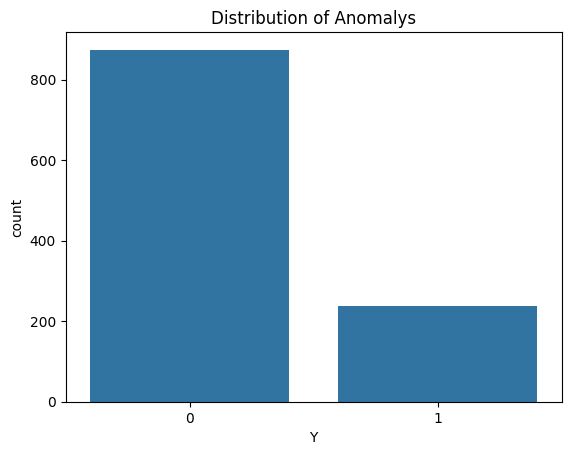

In [4]:

"""
Generation of the Visualization of the Exited column
"""

sns.countplot(x='Y', data=data)
plt.title("Distribution of Anomalys")


In [5]:
#Data to date time format
data['Data'] = pd.to_datetime(data['Data'], format='%m/%d/%Y')

#Describe the dataset to see numeric distrubutions
data_description = data.describe()

#Check for duplicated
duplicates = data.duplicated().sum()

#Correlation matrix to understand feature relationships
correlation_matrix = data.corr()

#Display the data
data_clean_info = {
    "Data Description": data_description.to_dict(),
    "Duplicate rows": duplicates,
    "Correlation with target": correlation_matrix['Y'].sort_values(ascending=False).to_dict()
}

data_clean_info

{'Data Description': {'Y': {'count': 1111.0,
   'mean': 0.21332133213321333,
   'min': 0.0,
   '25%': 0.0,
   '50%': 0.0,
   '75%': 0.0,
   'max': 1.0,
   'std': 0.40983719497182075},
  'Data': {'count': 1111,
   'mean': Timestamp('2010-08-31 00:00:00'),
   'min': Timestamp('2000-01-11 00:00:00'),
   '25%': Timestamp('2005-05-06 12:00:00'),
   '50%': Timestamp('2010-08-31 00:00:00'),
   '75%': Timestamp('2015-12-25 12:00:00'),
   'max': Timestamp('2021-04-20 00:00:00'),
   'std': nan},
  'XAU BGNL': {'count': 1111.0,
   'mean': 987.4637443744374,
   'min': 256.68,
   '25%': 433.74,
   '50%': 1137.8,
   '75%': 1324.8249999999998,
   'max': 2006.91,
   'std': 494.62373995115126},
  'ECSURPUS': {'count': 1111.0,
   'mean': 0.036153015301530166,
   'min': -0.974,
   '25%': -0.191,
   '50%': 0.035,
   '75%': 0.2605,
   'max': 0.991,
   'std': 0.3494533929761184},
  'BDIY': {'count': 1111.0,
   'mean': 2259.860486048605,
   'min': 291.0,
   '25%': 990.0,
   '50%': 1518.0,
   '75%': 2685.5,
 

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [8]:
selected_columns = ['VIX', 'BDIY', 'DXY', 'USGG30YR', 'GT10', 'GTDEM10Y', 'Y']

# Subset the data to include only selected columns
data_selected = data[selected_columns]

# Separate features and target
X = data_selected.drop(columns=['Y'])
y = data_selected['Y']

# Scale the features for PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to retain 95% of the variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for PCA-transformed features
pca_columns = [f"PC{i+1}" for i in range(X_pca.shape[1])]
pca_data = pd.DataFrame(X_pca, columns=pca_columns)
pca_data['Y'] = y.reset_index(drop=True)

# PCA summary
pca_summary = {
    "Explained Variance Ratio": pca.explained_variance_ratio_.tolist(),
    "Cumulative Variance Explained": pca.explained_variance_ratio_.cumsum().tolist(),
    "Reduced Dataset Shape": pca_data.shape
}

pca_summary

{'Explained Variance Ratio': [0.5255598400577133,
  0.24198009833964687,
  0.16421539866922807,
  0.057692694674482764],
 'Cumulative Variance Explained': [0.5255598400577133,
  0.7675399383973601,
  0.9317553370665882,
  0.989448031741071],
 'Reduced Dataset Shape': (1111, 5)}

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, roc_auc_score

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    pca_data.drop(columns=['Y']), pca_data['Y'], test_size=0.2, random_state=42, stratify=pca_data['Y']
)

# Train Logistic Regression
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

# Predictions
y_pred_logistic = logistic_model.predict(X_test)
y_pred_prob_logistic = logistic_model.predict_proba(X_test)[:, 1]

# Evaluate
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logistic))
print("Logistic Regression AUC-ROC Score:", roc_auc_score(y_test, y_pred_prob_logistic))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.91       175
           1       0.72      0.44      0.55        48

    accuracy                           0.84       223
   macro avg       0.79      0.70      0.73       223
weighted avg       0.83      0.84      0.83       223

Logistic Regression AUC-ROC Score: 0.9004761904761904


In [11]:

# Train Random Forest
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)

# Predictions
y_pred_rf = random_forest_model.predict(X_test)
y_pred_prob_rf = random_forest_model.predict_proba(X_test)[:, 1]

# Evaluate
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Random Forest AUC-ROC Score:", roc_auc_score(y_test, y_pred_prob_rf))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       175
           1       0.84      0.67      0.74        48

    accuracy                           0.90       223
   macro avg       0.88      0.82      0.84       223
weighted avg       0.90      0.90      0.90       223

Random Forest AUC-ROC Score: 0.9382738095238096


In [12]:

# Train XGBoost
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)
y_pred_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Evaluate
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))
print("XGBoost AUC-ROC Score:", roc_auc_score(y_test, y_pred_prob_xgb))


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:55:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       175
           1       0.81      0.73      0.77        48

    accuracy                           0.91       223
   macro avg       0.87      0.84      0.86       223
weighted avg       0.90      0.91      0.90       223

XGBoost AUC-ROC Score: 0.9303571428571429


In [13]:

# Train Isolation Forest
iso_forest = IsolationForest(random_state=42)
iso_forest.fit(X_train)

# Predictions
iso_forest_preds = iso_forest.predict(X_test)

# Convert predictions to binary (1 = anomaly, 0 = normal)
iso_forest_preds_binary = [1 if pred == -1 else 0 for pred in iso_forest_preds]

# Evaluate
print("Isolation Forest Classification Report:")
print(classification_report(y_test, iso_forest_preds_binary))


Isolation Forest Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       175
           1       0.64      0.52      0.57        48

    accuracy                           0.83       223
   macro avg       0.76      0.72      0.74       223
weighted avg       0.82      0.83      0.83       223



In [14]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Generate a recent date range (e.g., last 3 years + 1 year forecast)
n_days = 1000
start_date = "2021-01-01"
dates = pd.date_range(start=start_date, periods=n_days)

# Generate features
data = {
    "Data": dates,
    "ECSURPUS": np.random.normal(loc=5.0, scale=1.5, size=n_days),  # Economic surprise index
    "BDIY": np.random.normal(loc=1200, scale=300, size=n_days),  # Baltic Dry Index
    "CRY": np.random.normal(loc=200, scale=50, size=n_days),  # Commodity index
    "DXY": np.random.normal(loc=95, scale=2, size=n_days),  # Dollar Index
    "JPY": np.random.normal(loc=110, scale=5, size=n_days),  # JPY/USD exchange rate
    "GBP": np.random.normal(loc=1.35, scale=0.05, size=n_days),  # GBP/USD exchange rate
    "Cl1": np.random.normal(loc=60, scale=10, size=n_days),  # Crude oil price
    "VIX": np.random.normal(loc=20, scale=5, size=n_days),  # Volatility index
    "GTJPY2YR": np.random.normal(loc=0.2, scale=0.1, size=n_days),  # 2-year Japan gov bond yield
    "MXEU": np.random.normal(loc=1500, scale=200, size=n_days),  # Europe equity index
    "MXJP": np.random.normal(loc=22000, scale=2000, size=n_days),  # Japan equity index
    "MXBR": np.random.normal(loc=100000, scale=10000, size=n_days),  # Brazil equity index
    "MXRU": np.random.normal(loc=1300, scale=200, size=n_days),  # Russia equity index
}

# Convert to a DataFrame
synthetic_data = pd.DataFrame(data)

# Add a trend and noise to simulate realistic time-series behavior
for col in ["ECSURPUS", "BDIY", "CRY", "DXY", "JPY", "GBP", "Cl1", "VIX", "GTJPY2YR", "MXEU", "MXJP", "MXBR", "MXRU"]:
    synthetic_data[col] += np.sin(np.linspace(0, 10, n_days)) * 10  # Add sinusoidal trend
    synthetic_data[col] += np.random.normal(scale=5, size=n_days)  # Add random noise

# Preview the data
print(synthetic_data.head())

        Data  ECSURPUS         BDIY         CRY        DXY         JPY  \
0 2021-01-01  5.803753  1618.685426  165.523970  95.580921  103.983426   
1 2021-01-02  7.529895  1476.436030  192.710885  93.575874  110.854755   
2 2021-01-03 -1.883294  1229.266435  160.900665  89.811348  117.089131   
3 2021-01-04  2.985309  1010.265776  189.636486  96.763135  112.439863   
4 2021-01-05  4.308171  1422.270542  101.983474  98.227667   99.135438   

        GBP        Cl1        VIX   GTJPY2YR         MXEU          MXJP  \
0  2.937988  50.184722  25.667357  12.752360  1646.292269  20654.004724   
1 -2.479361  51.488173  12.628312   0.150076  1714.148693  21390.817949   
2  4.917187  49.088651  19.091316  -1.179886  1605.707012  20804.270116   
3 -1.318058  51.940171  22.029556  -2.040071  1112.143974  22226.021263   
4  5.534710  67.845088  16.487169   2.609914  1474.011252  24398.967701   

            MXBR         MXRU  
0   88214.846259  1535.817179  
1  104325.035126   924.365187  
2  11111

In [15]:

synthetic_data.to_csv("synthetic_market_data.csv", index=False)